In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
file_path = "/content/drive/MyDrive/Wind_data/updated_merged_wind_data.csv"
df = pd.read_csv(file_path)

# Now you can work with the dataframe 'df'


In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/Wind_data/merged_wind_data - Copy.csv"
df2 = pd.read_csv(file_path)

In [ ]:
df

,WS50M,WS10M,WS100M,WS80M
0,2.78,2.02,4.510,4.306
1,3.54,2.43,5.269,4.988
2,4.02,2.67,5.973,5.620
3,4.11,2.71,6.093,5.724
4,4.05,2.67,5.923,5.569
...,...,...,...,...
43819,2.54,1.71,3.831,3.657
43820,2.61,1.81,4.065,3.881
43821,2.58,1.84,4.242,4.052
43822,2.61,1.89,4.452,4.247


In [ ]:
import pandas as pd

# Assuming df and df2 are already loaded DataFrames

# Concatenate df and df2 horizontally
combined_df = pd.concat([df, df2], axis=1)

# Display the combined DataFrame
print(combined_df)


       WS50M  WS10M  WS100M  WS80M  electricity
0       2.78   2.02   4.510  4.306       50.031
1       3.54   2.43   5.269  4.988       82.902
2       4.02   2.67   5.973  5.620      121.623
3       4.11   2.71   6.093  5.724      128.826
4       4.05   2.67   5.923  5.569      118.837
...      ...    ...     ...    ...          ...
43819   2.54   1.71   3.831  3.657       26.790
43820   2.61   1.81   4.065  3.881       34.261
43821   2.58   1.84   4.242  4.052       40.040
43822   2.61   1.89   4.452  4.247       47.620
43823   2.77   1.99   4.671  4.448       56.130

[43824 rows x 5 columns]


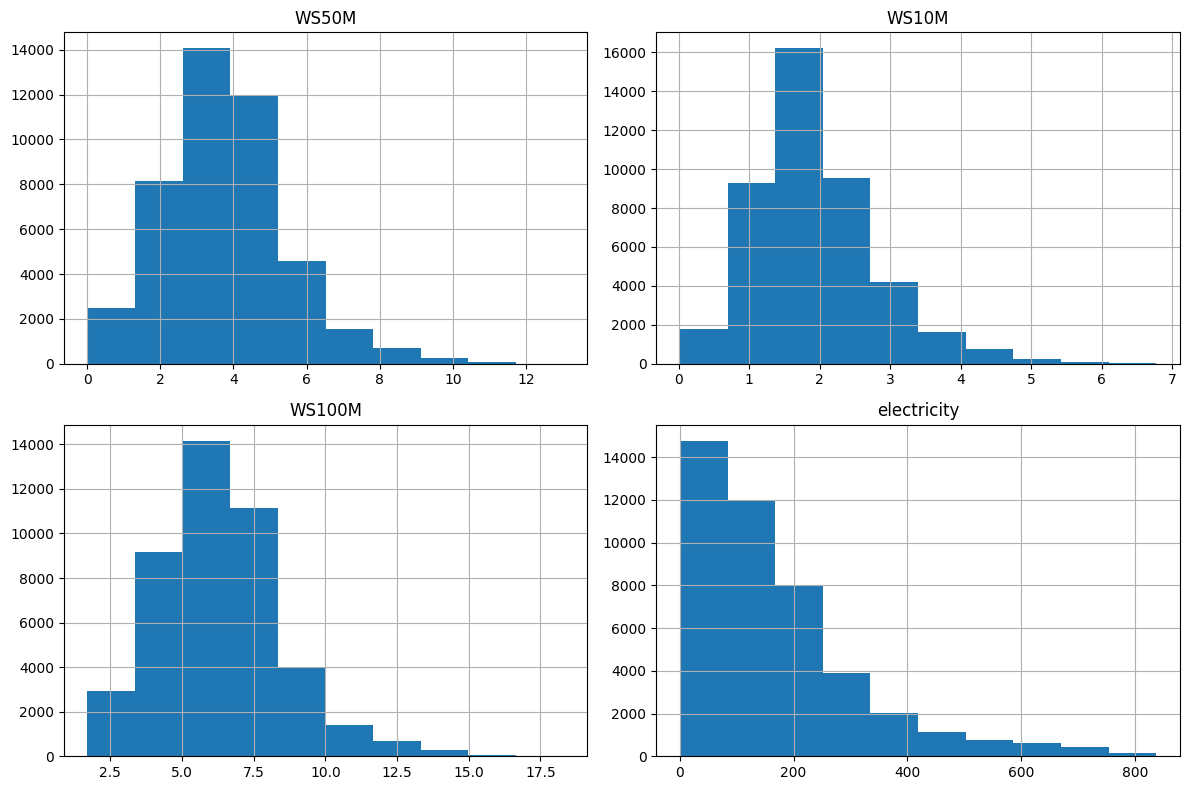

In [ ]:
# Visualize columns of combined DataFrame using histograms, excluding 'WS80M'
combined_df.drop(columns=['WS80M']).hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


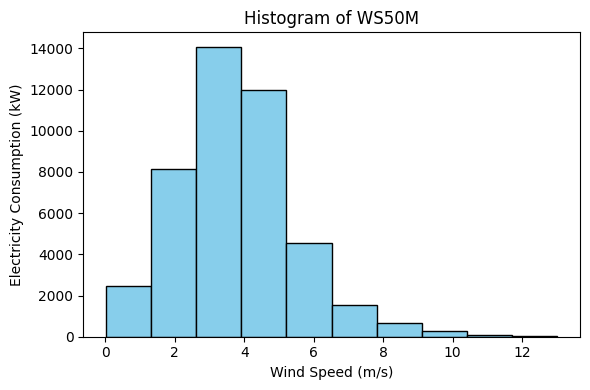

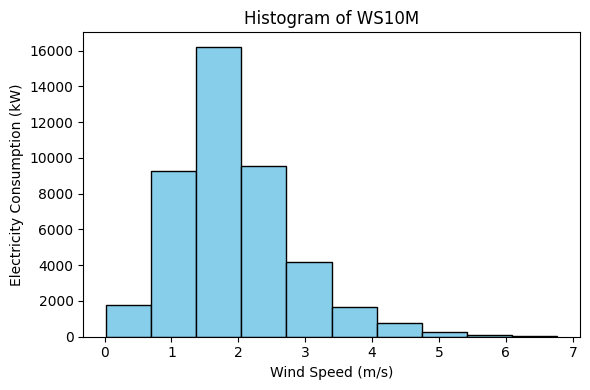

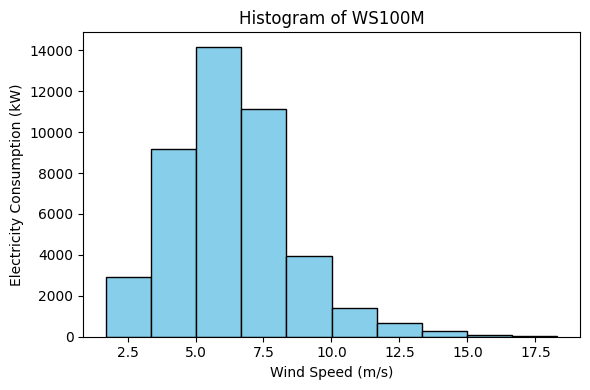

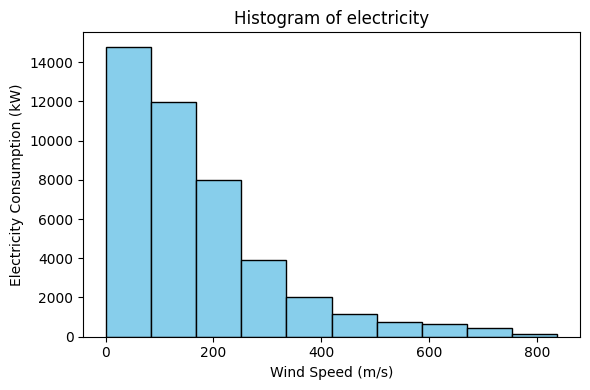

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each column except 'WS80M'
for column in combined_df.columns:
    if column != 'WS80M':
        # Create a new figure and axis for each plot
        plt.figure(figsize=(6, 4))
        plt.hist(combined_df[column], bins=10, color='skyblue', edgecolor='black')

        # Set x and y axis labels
        plt.xlabel('Wind Speed (m/s)')
        plt.ylabel('Electricity Consumption (kW)')

        # Set title
        plt.title(f'Histogram of {column}')

        plt.tight_layout()
        plt.show()


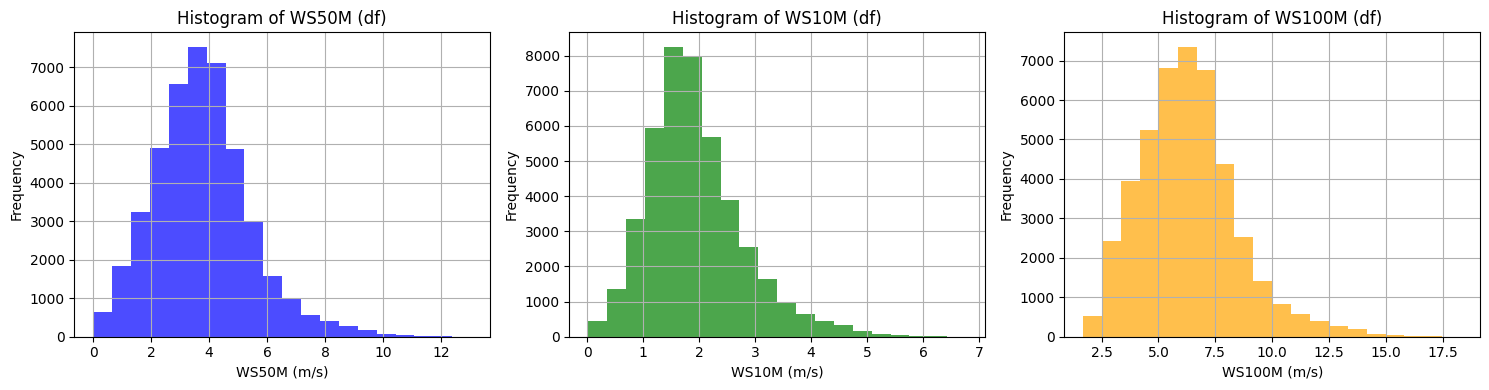

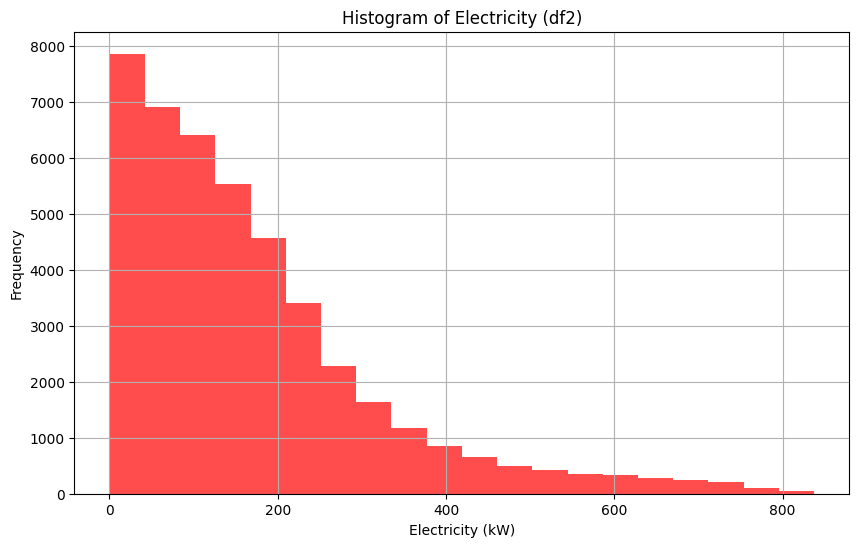

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for WS50M, WS10M, and WS100M in df
plt.figure(figsize=(15, 4))

# Histogram for WS50M
plt.subplot(1, 3, 1)
plt.hist(df['WS50M'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of WS50M (df)')
plt.xlabel('WS50M (m/s)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for WS10M
plt.subplot(1, 3, 2)
plt.hist(df['WS10M'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of WS10M (df)')
plt.xlabel('WS10M (m/s)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for WS100M
plt.subplot(1, 3, 3)
plt.hist(df['WS100M'], bins=20, color='orange', alpha=0.7)
plt.title('Histogram of WS100M (df)')
plt.xlabel('WS100M (m/s)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot histogram for electricity in df2
plt.figure(figsize=(10, 6))
plt.hist(df2['electricity'], bins=20, color='red', alpha=0.7)
plt.title('Histogram of Electricity (df2)')
plt.xlabel('Electricity (kW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


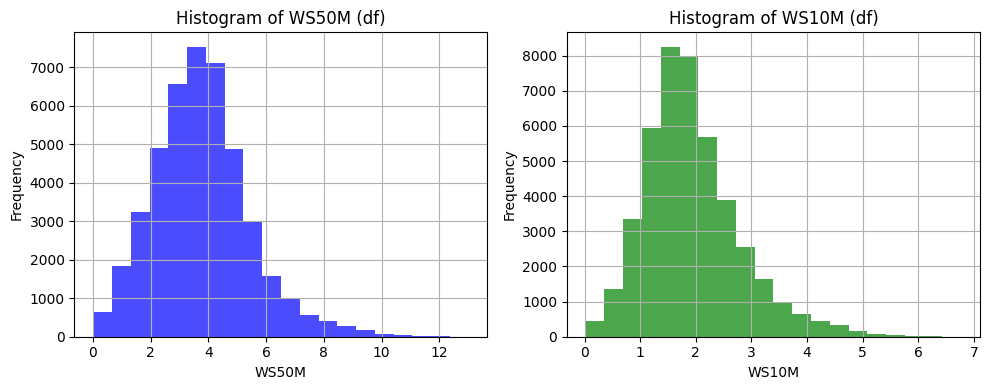

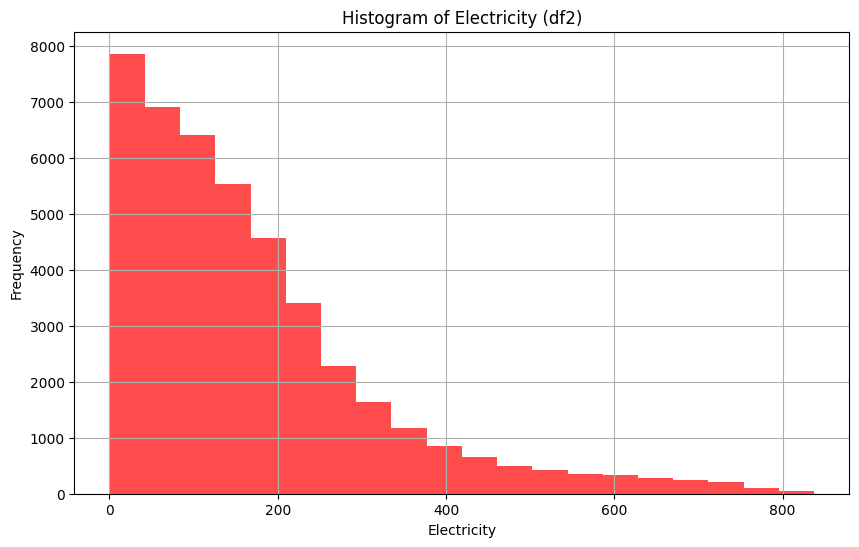

In [ ]:


# Plot histograms for WS50M and WS10M in df
plt.figure(figsize=(10, 4))

# Histogram for WS50M
plt.subplot(1, 2, 1)
plt.hist(df['WS50M'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of WS50M (df)')
plt.xlabel('WS50M')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for WS10M
plt.subplot(1, 2, 2)
plt.hist(df['WS10M'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of WS10M (df)')
plt.xlabel('WS10M')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot histogram for electricity in df2
plt.figure(figsize=(10, 6))
plt.hist(df2['electricity'], bins=20, color='red', alpha=0.7)
plt.title('Histogram of Electricity (df2)')
plt.xlabel('Electricity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
combined_df.corr()

,WS50M,WS10M,WS100M,WS80M,electricity
WS50M,1.000000,0.914029,0.974782,0.973744,0.946880
WS10M,0.914029,1.000000,0.884213,0.887910,0.880893
WS100M,0.974782,0.884213,1.000000,0.999893,0.974841
WS80M,0.973744,0.887910,0.999893,1.000000,0.975842
electricity,0.946880,0.880893,0.974841,0.975842,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd


# Split the data into features (X) and target (y)
X = df[['WS10M', 'WS50M', 'WS100M']]  # Features
y = df2['electricity']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 1004.7538218512916
Coefficients: [ 20.41200421 -30.98984856 156.60606194]
Intercept: 168.11363632733384


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.3357566816474375


Mean Squared Error: 1.3357566816474375
Root Mean Squared Error: 1.155749402616085
Mean Absolute Error: 0.8171633127020372
R-squared: 0.9999404328994548


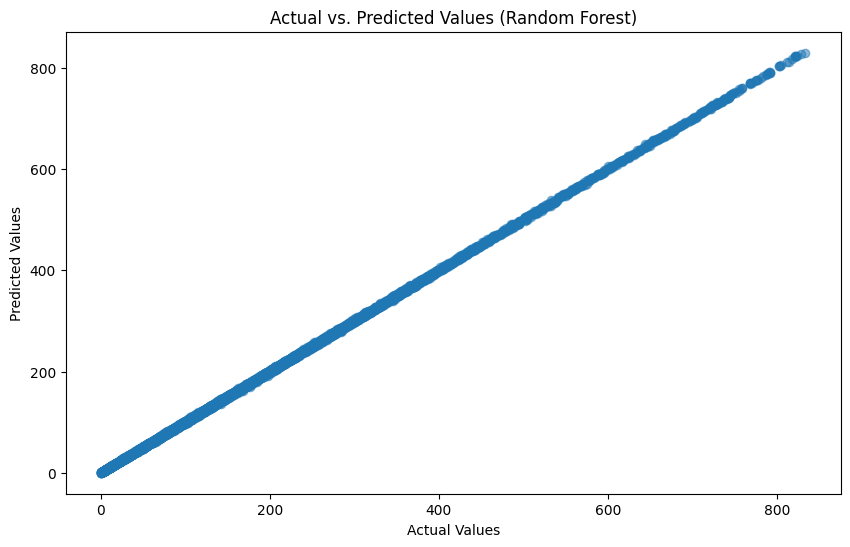

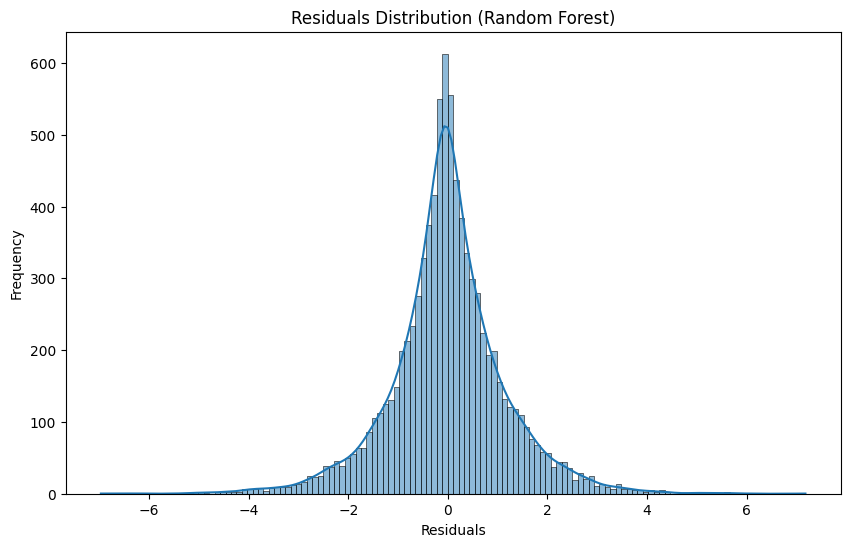

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_scaled)

# Compute performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Random Forest)')
plt.show()


In [ ]:
import random

# Generate a random day within the year
random_day = random.randint(1, 364)

# Calculate the start and end indices based on the random day
selected_points_one_day_start = 25 * random_day +4
selected_points_one_day_end = 25 * (random_day + 1)+4

# Get the exact date for the random day
random_date = pd.to_datetime('2019-01-01') + pd.Timedelta(days=random_day - 1)

# Select the first 24 points of data (one day)
y_test_selected_one_day = y_test[selected_points_one_day_start:selected_points_one_day_end]
y_pred_selected_one_day = y_pred[selected_points_one_day_start:selected_points_one_day_end]

# Create a time range for x-axis
time_range_selected_one_day = pd.date_range(start=random_date, periods=len(y_test_selected_one_day), freq='H')


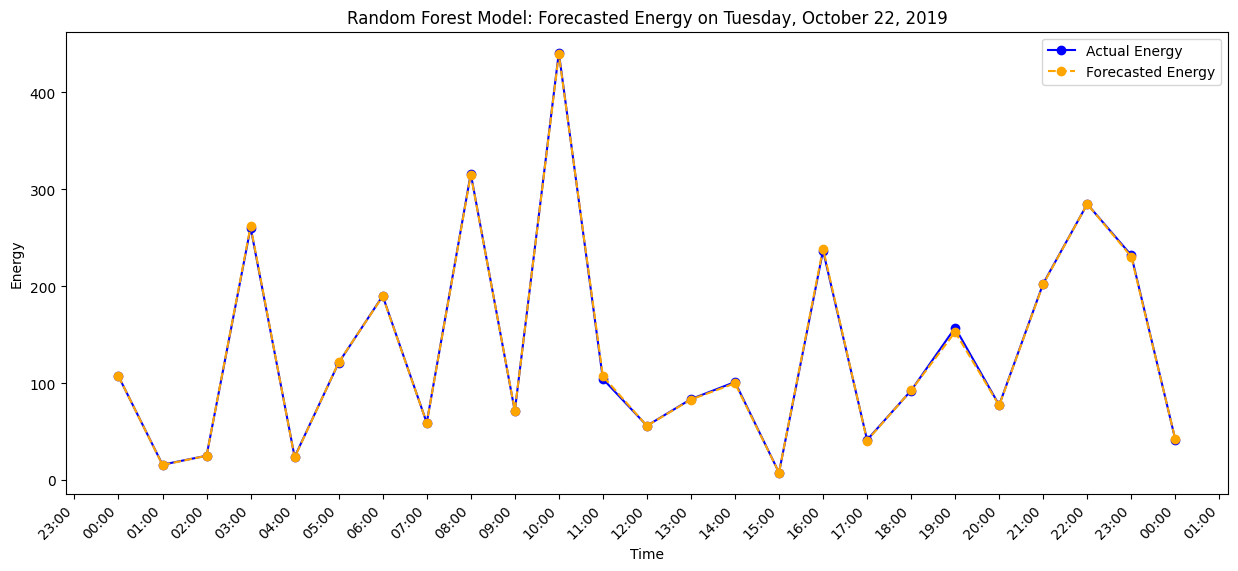

In [ ]:
import matplotlib.dates as mdates

# Plot forecasted energy for the selected points (one day) with the exact date and day
plt.figure(figsize=(15, 6))
plt.plot(time_range_selected_one_day, y_test_selected_one_day, label='Actual Energy', marker='o', color='blue')
plt.plot(time_range_selected_one_day, y_pred_selected_one_day, label='Forecasted Energy', marker='o', linestyle='--', color='orange')
plt.title(f'Random Forest Model: Forecasted Energy on {random_date.strftime("%A, %B %d, %Y")}')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every hour on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis labels as hours and minutes
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)


Mean Squared Error (Decision Tree): 2.4797247410154015


In [ ]:
from xgboost import XGBRegressor

# Train the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)


Mean Squared Error (XGBoost): 6.86036440078532


In [ ]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

Epoch 1/50
877/877 [==============================] - 4s 3ms/step - loss: 9879.7373 - val_loss: 307.2189
Epoch 2/50
877/877 [==============================] - 2s 2ms/step - loss: 260.1740 - val_loss: 174.7856
Epoch 3/50
877/877 [==============================] - 2s 2ms/step - loss: 161.6560 - val_loss: 114.1455
Epoch 4/50
877/877 [==============================] - 2s 3ms/step - loss: 116.7296 - val_loss: 88.2547
Epoch 5/50
877/877 [==============================] - 2s 2ms/step - loss: 96.5582 - val_loss: 65.2504
Epoch 6/50
877/877 [==============================] - 2s 2ms/step - loss: 83.2238 - val_loss: 53.8678
Epoch 7/50
877/877 [==============================] - 3s 3ms/step - loss: 70.5119 - val_loss: 44.0967
Epoch 8/50
877/877 [==============================] - 2s 3ms/step - loss: 58.5361 - val_loss: 35.4090
Epoch 9/50
877/877 [==============================] - 2s 2ms/step - loss: 47.2927 - val_loss: 29.1630
Epoch 10/50
877/877 [==============================] - 2s 2ms/step - loss:

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Reshape the data for LSTM input (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (for regression)
])

# Define the optimizer with an initial learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
mse = model.evaluate(X_test_lstm, y_test_lstm)
print("Mean Squared Error:", mse)

Exception ignored in: <function _xla_gc_callback at 0x7f025b598d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_22" is incompatible with the layer: expected shape=(None, 1, 3), found shape=(None, 3)


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Define custom time steps
custom_time_steps = 1

# Reshape the data for LSTM input with custom time steps
def reshape_data_for_lstm(X_scaled, y, time_steps):
    X_lstm = []
    y_lstm = []
    for i in range(len(X_scaled) - time_steps):
        X_lstm.append(X_scaled[i:i+time_steps])
        y_lstm.append(y[i+time_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Reshape the training and testing data
X_train_lstm, y_train_lstm = reshape_data_for_lstm(X_train_scaled, y_train.values, custom_time_steps)
X_test_lstm, y_test_lstm = reshape_data_for_lstm(X_test_scaled, y_test.values, custom_time_steps)

In [ ]:


# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test_lstm, y_test_lstm)
print("Mean Squared Error:", mse)


Epoch 1/50
877/877 [==============================] - 5s 3ms/step - loss: 43369.0664 - val_loss: 33526.6641
Epoch 2/50
877/877 [==============================] - 2s 3ms/step - loss: 28628.5176 - val_loss: 25655.1328
Epoch 3/50
877/877 [==============================] - 2s 3ms/step - loss: 23976.5391 - val_loss: 22821.3926
Epoch 4/50
877/877 [==============================] - 2s 3ms/step - loss: 22396.1699 - val_loss: 22051.5820
Epoch 5/50
877/877 [==============================] - 4s 4ms/step - loss: 22098.2969 - val_loss: 21923.1641
Epoch 6/50
877/877 [==============================] - 2s 3ms/step - loss: 22054.1934 - val_loss: 21863.6777
Epoch 7/50
877/877 [==============================] - 2s 3ms/step - loss: 22040.0938 - val_loss: 21852.5664
Epoch 8/50
877/877 [==============================] - 2s 3ms/step - loss: 22033.7969 - val_loss: 21845.5215
Epoch 9/50
877/877 [==============================] - 2s 3ms/step - loss: 22029.0762 - val_loss: 21845.5781
Epoch 10/50
877/877 [=======

In [ ]:
import pandas as pd

# File paths
file_paths = [
    "/content/ninja_wind_42.3308_-7.4015_corrected (8).csv",
    "/content/ninja_wind_42.3308_-7.4015_corrected (9).csv",
    "/content/ninja_wind_42.3308_-7.4015_corrected (10).csv",
    "/content/ninja_wind_42.3308_-7.4015_corrected (11).csv",
    "/content/ninja_wind_42.3308_-7.4015_corrected (12).csv"
]

# List to hold DataFrames
dfs = []

# Load each CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Optionally, concatenate the DataFrames into a single DataFrame if needed
# combined_df = pd.concat(dfs, ignore_index=True)


In [ ]:
df1 = pd.read_csv('/content/ninja_wind_42.3308_-7.4015_corrected (12).csv')

In [ ]:
df2 = pd.read_csv('/content/ninja_wind_42.3308_-7.4015_corrected (8).csv')
df3 = pd.read_csv('/content/ninja_wind_42.3308_-7.4015_corrected (9).csv')
df4 = pd.read_csv('/content/ninja_wind_42.3308_-7.4015_corrected (10).csv')
df5 = pd.read_csv('/content/ninja_wind_42.3308_-7.4015_corrected (11).csv')


In [ ]:
import pandas as pd

# Load each CSV file into a separate DataFrame
df1 = pd.read_csv('/content/ninja_wind_2015.csv', header=None)
df2 = pd.read_csv('/content/ninja_wind_2016.csv', header=None)
df3 = pd.read_csv('/content/ninja_wind_2017.csv', header=None)
df4 = pd.read_csv('/content/ninja_wind_2018.csv', header=None)
df5 = pd.read_csv('/content/ninja_wind_2019.csv', header=None)

# Concatenate all DataFrames into a single DataFrame vertically
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Rename the column if needed
combined_df.columns = ['Wind Speed']

# Display the combined DataFrame
print(combined_df)


       Wind Speed
0           4.510
1           5.269
2           5.973
3           6.093
4           5.923
...           ...
43819       3.831
43820       4.065
43821       4.242
43822       4.452
43823       4.671

[43824 rows x 1 columns]


In [ ]:
df2

,W_2016
0,6.886
1,6.801
2,6.882
3,7.165
4,7.322
...,...
8779,2.546
8780,2.971
8781,3.543
8782,4.177


In [ ]:
df3

,W_2017
0,5.200
1,5.445
2,5.601
3,5.602
4,5.512
...,...
8755,8.151
8756,7.965
8757,8.074
8758,8.145


In [ ]:
df4

,W_2018
0,9.115
1,9.486
2,9.934
3,10.582
4,11.112
...,...
8755,5.218
8756,6.233
8757,7.140
8758,7.720


In [ ]:
df5

,W_2019
0,7.826
1,7.763
2,7.432
3,6.976
4,6.487
...,...
8755,3.831
8756,4.065
8757,4.242
8758,4.452


In [ ]:
df

,WS50M,WS10M
0,2.78,2.02
1,3.54,2.43
2,4.02,2.67
3,4.11,2.71
4,4.05,2.67
...,...,...
43819,2.54,1.71
43820,2.61,1.81
43821,2.58,1.84
43822,2.61,1.89


In [ ]:
# Rename 'Wind Speed' column to 'WS100M' in combined_df
combined_df.rename(columns={'Wind Speed': 'WS100M'}, inplace=True)

# Concatenate df with combined_df
df = pd.concat([df, combined_df], axis=1)

# Display the updated DataFrame df
print(df)

       WS50M  WS10M  WS100M
0       2.78   2.02   4.510
1       3.54   2.43   5.269
2       4.02   2.67   5.973
3       4.11   2.71   6.093
4       4.05   2.67   5.923
...      ...    ...     ...
43819   2.54   1.71   3.831
43820   2.61   1.81   4.065
43821   2.58   1.84   4.242
43822   2.61   1.89   4.452
43823   2.77   1.99   4.671

[43824 rows x 3 columns]


In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/Wind_data/merged_wind_data.csv"
df_1 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df_1.head())

               time        local_time  electricity  wind_speed
0  01-01-2015 00:00  01-01-2015 01:00       50.031       4.306
1  01-01-2015 01:00  01-01-2015 02:00       82.902       4.988
2  01-01-2015 02:00  01-01-2015 03:00      121.623       5.620
3  01-01-2015 03:00  01-01-2015 04:00      128.826       5.724
4  01-01-2015 04:00  01-01-2015 05:00      118.837       5.569


In [ ]:
# Assuming df_1 is already loaded and contains the 'wind_speed' column
# Rename the 'wind_speed' column as 'WS80M'
df_1.rename(columns={'wind_speed': 'WS80M'}, inplace=True)

# Extract only the 'wind_speed' column from df_1
wind_speed_column = df_1['WS80M']

# Add the 'WS80M' column to df
df['WS80M'] = wind_speed_column

# Display the first few rows of the updated DataFrame df
df


,WS50M,WS10M,WS100M,WS80M
0,2.78,2.02,4.510,4.306
1,3.54,2.43,5.269,4.988
2,4.02,2.67,5.973,5.620
3,4.11,2.71,6.093,5.724
4,4.05,2.67,5.923,5.569
...,...,...,...,...
43819,2.54,1.71,3.831,3.657
43820,2.61,1.81,4.065,3.881
43821,2.58,1.84,4.242,4.052
43822,2.61,1.89,4.452,4.247


In [ ]:
# Specify the file path where you want to save the CSV file
output_file_path = "/content/drive/MyDrive/Wind_data/updated_merged_wind_data.csv"

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print("DataFrame saved to CSV successfully.")

DataFrame saved to CSV successfully.


In [ ]:
df.isnull().sum()

WS50M     0
WS10M     0
WS100M    0
WS80M     0
dtype: int64